In [34]:
# Set Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read Coupons File

In [35]:
coupons = pd.read_csv('sample_data/coupons.csv')

Exlore the data to understand shape, contents and quality of data

In [36]:
coupons.shape

(12684, 26)

In [37]:
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [38]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Find out % of Missing rows for each field

In [39]:
# Calculate percentage of missing values for each column
missing_percentage = (coupons.isnull().sum() / len(coupons)) * 100

# Display the result
print(missing_percentage)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


"car" field is unuusable with 99+% of missing data, drop it. Find a way to clean data for all other fields.

In [40]:
coupons = coupons.drop('car', axis=1)

In [41]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

Continue exploring the data -chart a few plots

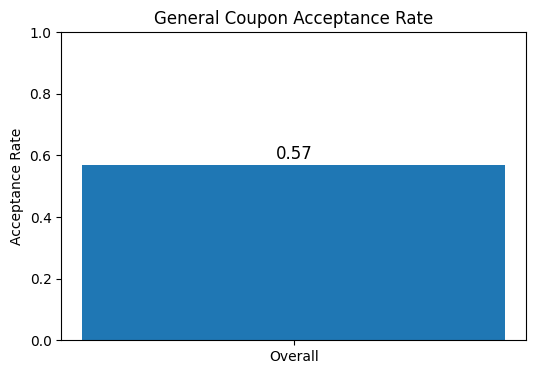

In [42]:
# Calculate the overall acceptance rate
overall_acceptance_rate = coupons['Y'].mean()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Overall'], [overall_acceptance_rate])
plt.title('General Coupon Acceptance Rate')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.text(0, overall_acceptance_rate + 0.02, f'{overall_acceptance_rate:.2f}', ha='center', fontsize=12)  # Add acceptance rate value above the bar
plt.show()

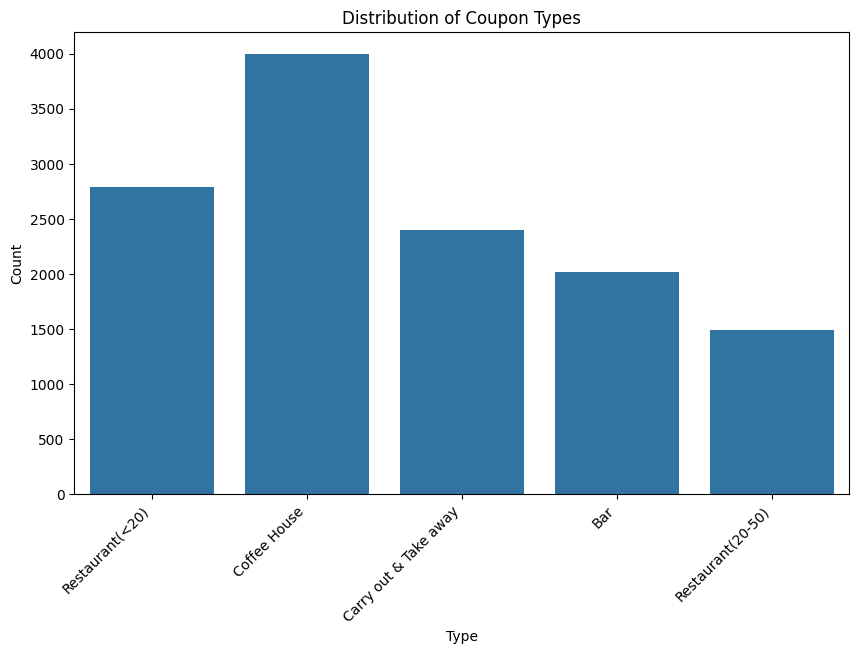

In [43]:
# By Coupon types
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=coupons)
plt.title('Distribution of Coupon Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


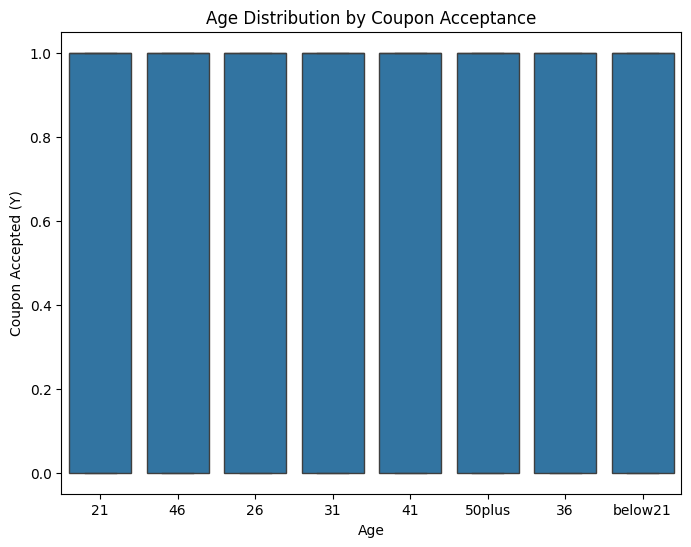

In [44]:
# Age by coupon acceptance
plt.figure(figsize=(8, 6))
sns.boxplot(y='Y', x='age', data=coupons)
plt.title('Age Distribution by Coupon Acceptance')
plt.ylabel('Coupon Accepted (Y)')
plt.xlabel('Age')
plt.show()

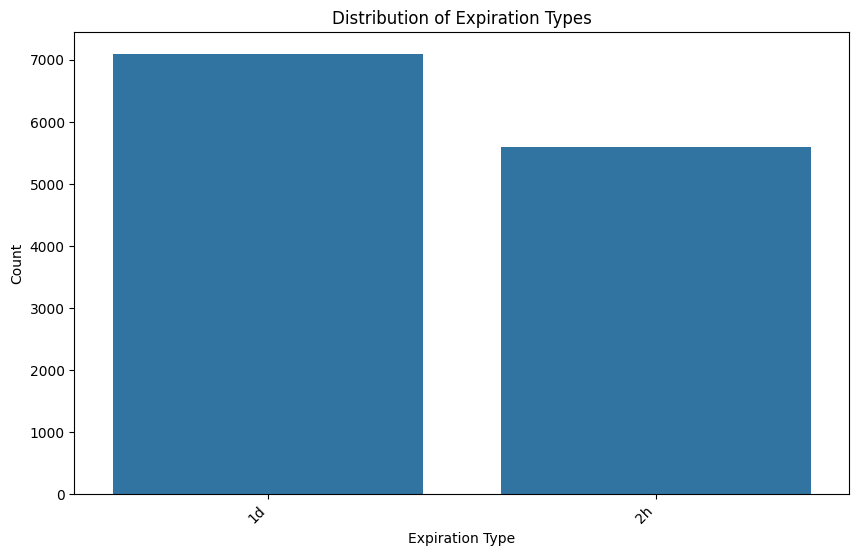

In [45]:
# Bar plot of expiration types

plt.figure(figsize=(10, 6))
sns.countplot(x='expiration', data=coupons)
plt.title('Distribution of Expiration Types')
plt.xlabel('Expiration Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-47-e664ed29ac6a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='passanger', y='Y', data=coupons,ci=None)


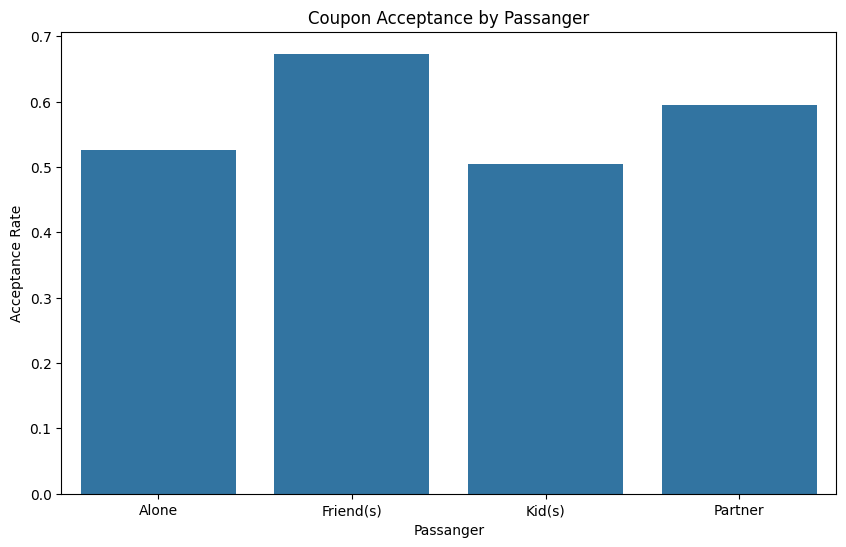

In [47]:
# Create a bar plot by passanger
plt.figure(figsize=(10, 6))
sns.barplot(x='passanger', y='Y', data=coupons,ci=None)
plt.title('Coupon Acceptance by Passanger')
plt.xlabel('Passanger')
plt.ylabel('Acceptance Rate')
plt.show()

<ipython-input-49-cf20d075e961>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='temperature', y='Y', data=coupons, ci=None)


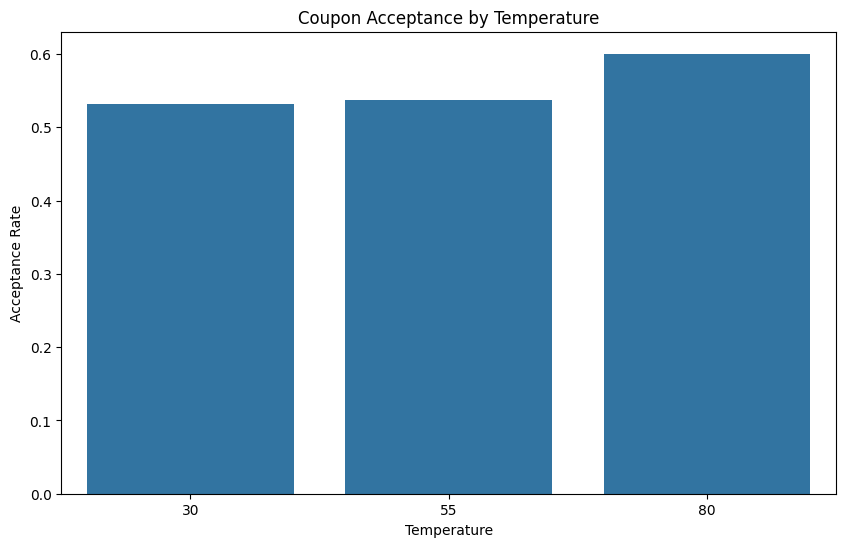

In [49]:
# Create a bar plot by temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature', y='Y', data=coupons, ci=None)
plt.title('Coupon Acceptance by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.show()

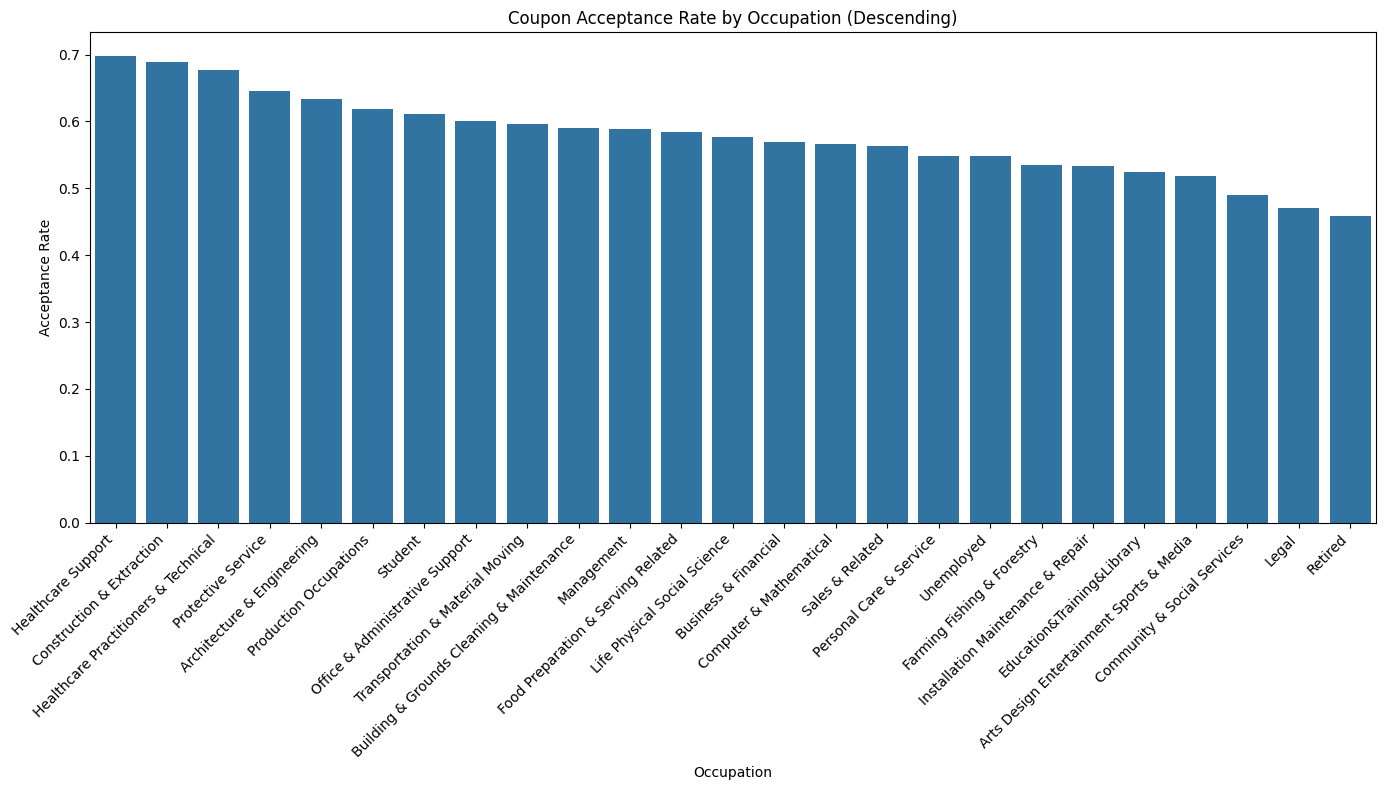

In [51]:
# Create a decending bar plot by occupation

# Calculate acceptance rate for each occupation and sort
acceptance_by_occupation = coupons.groupby('occupation')['Y'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(14, 8))  # Adjust figure size for better readability
sns.barplot(x=acceptance_by_occupation.index, y=acceptance_by_occupation.values)
plt.title('Coupon Acceptance Rate by Occupation (Descending)')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.tight_layout()
plt.show()


<ipython-input-52-0ce538b497b4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education', y='Y', data=coupons, ci=None, order=coupons.groupby('education')['Y'].mean().sort_values(ascending=False).index)


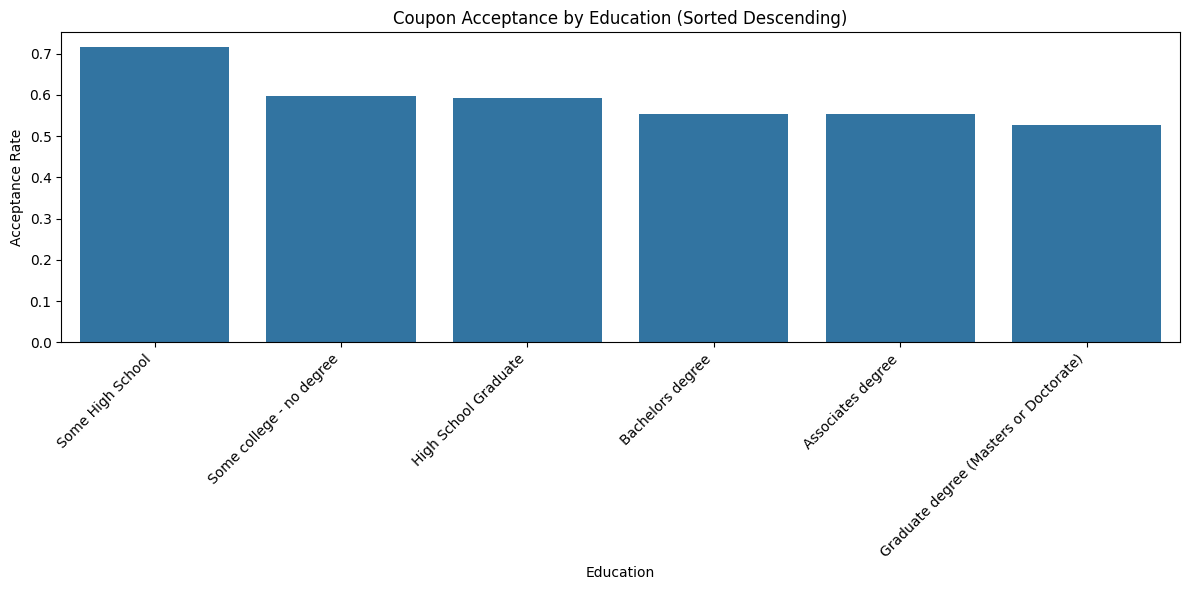

In [52]:
# Create a bar plot with sorted education levels
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='Y', data=coupons, ci=None, order=coupons.groupby('education')['Y'].mean().sort_values(ascending=False).index)
plt.title('Coupon Acceptance by Education (Sorted Descending)')
plt.xlabel('Education')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

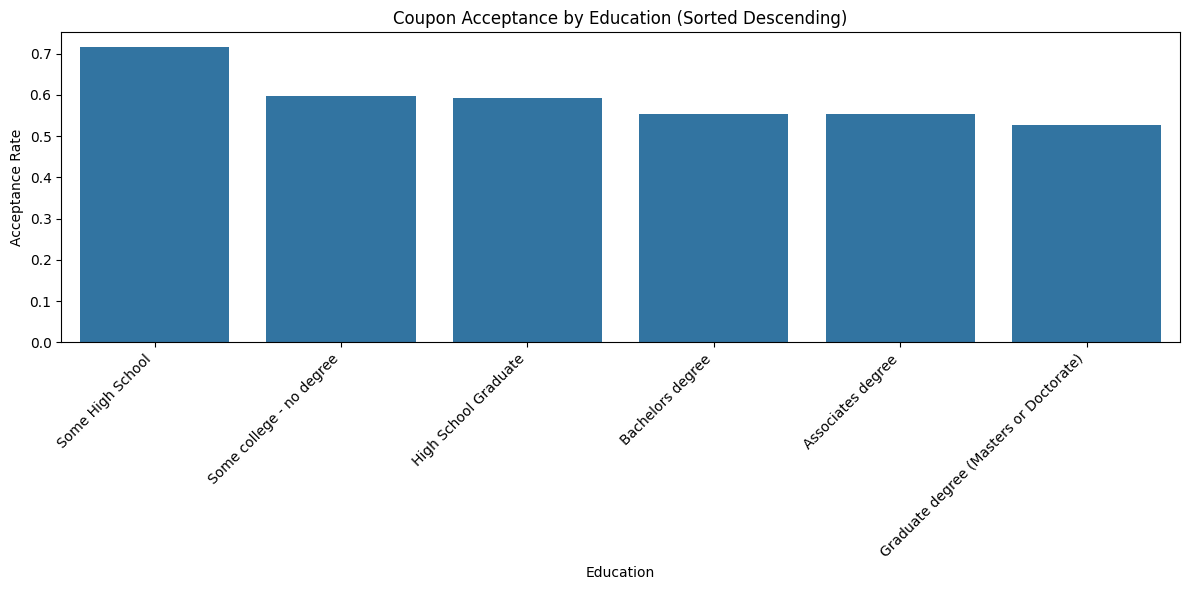

In [53]:
# Calculate acceptance rate for each education level
acceptance_rates = coupons.groupby('education')['Y'].mean().sort_values(ascending=False)

# Create a bar plot with sorted education levels
plt.figure(figsize=(12, 6))
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.title('Coupon Acceptance by Education (Sorted Descending)')
plt.xlabel('Education')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-33-2b6a4a62afa4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = pd.to_numeric(data['age'], errors='coerce')
<ipython-input-33-2b6a4a62afa4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = pd.to_numeric(data['income'], errors='coerce')
<ipython-input-33-2b6a4a62afa4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

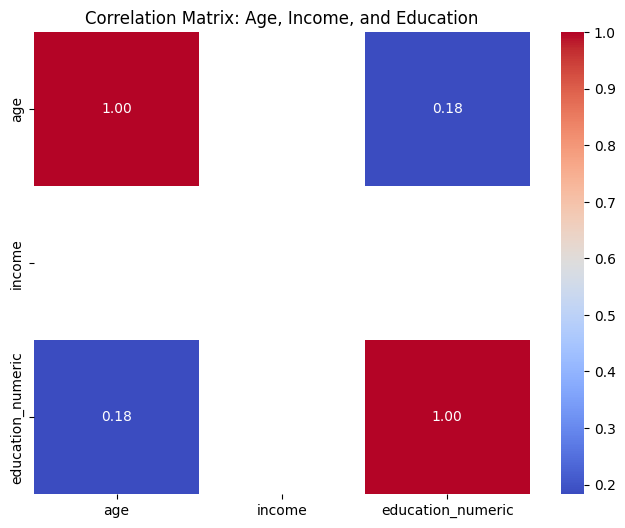

In [33]:
# Find correlation between Age, Income and Education and plot it

# Select the relevant columns
data = coupons[['age', 'income', 'education']]

# Check and convert data types
if not pd.api.types.is_numeric_dtype(data['age']):
    data['age'] = pd.to_numeric(data['age'], errors='coerce')
if not pd.api.types.is_numeric_dtype(data['income']):
    data['income'] = pd.to_numeric(data['income'], errors='coerce')

# Convert 'education' to numerical representation
education_mapping = {
    'Some High School': 1,
    'High School Graduate': 2,
    'Some College': 3,
    'Associates degree': 4,
    'Bachelors degree': 5,
    'Graduate degree (Masters or Doctorate)': 6
}
data['education_numeric'] = data['education'].map(education_mapping)

# Calculate the correlation matrix
correlation_matrix = data[['age', 'income', 'education_numeric']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Age, Income, and Education')
plt.show()

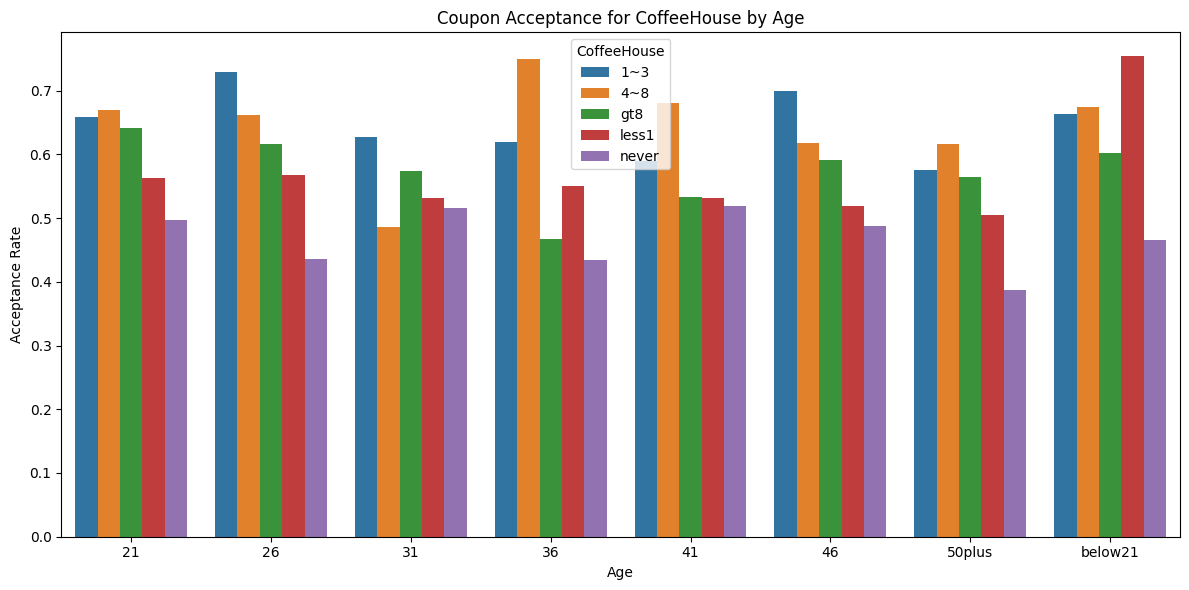

In [54]:
# Group data by age and CoffeeHouse, calculate acceptance rate
acceptance_by_age_coffeehouse = coupons.groupby(['age', 'CoffeeHouse'])['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='Y', hue='CoffeeHouse', data=acceptance_by_age_coffeehouse)
plt.title('Coupon Acceptance for CoffeeHouse by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

<ipython-input-56-c0bba7031a01>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='coupon', y='Y', hue='gender', data=coupons, ci=None)


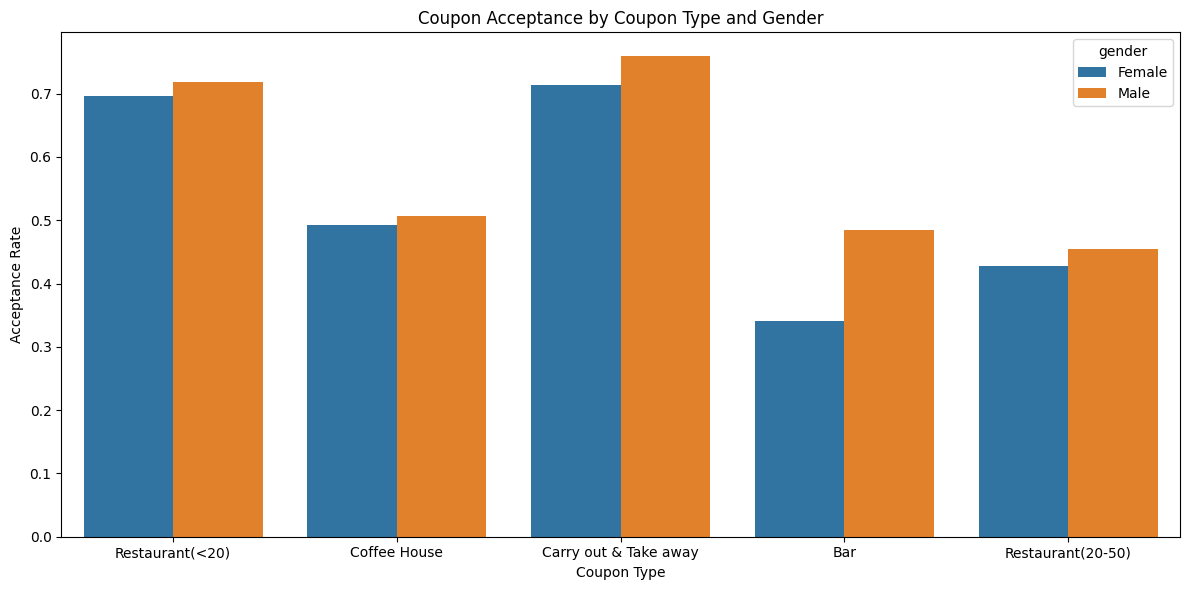

In [56]:
# Create a grouped bar plot Coupon Acceptance by Coupon Type and Gender

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.barplot(x='coupon', y='Y', hue='gender', data=coupons, ci=None)
plt.title('Coupon Acceptance by Coupon Type and Gender')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

<ipython-input-58-eb7417a58ee3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='Y', data=coupons, ci=None)


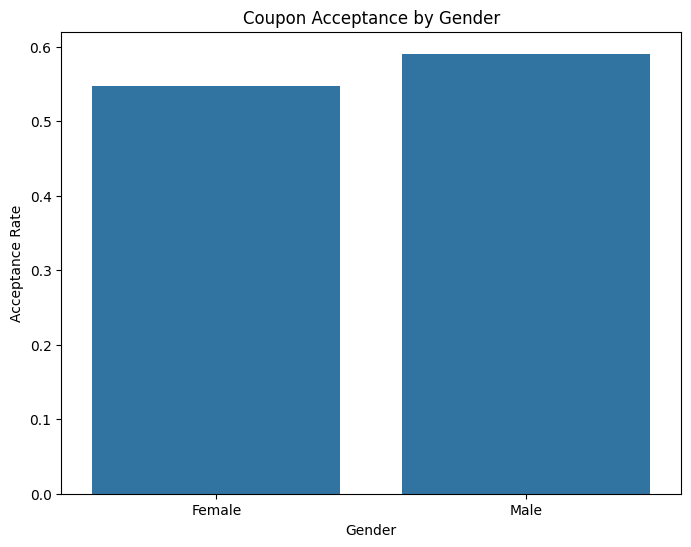

In [58]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='Y', data=coupons, ci=None)
plt.title('Coupon Acceptance by Gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.show()

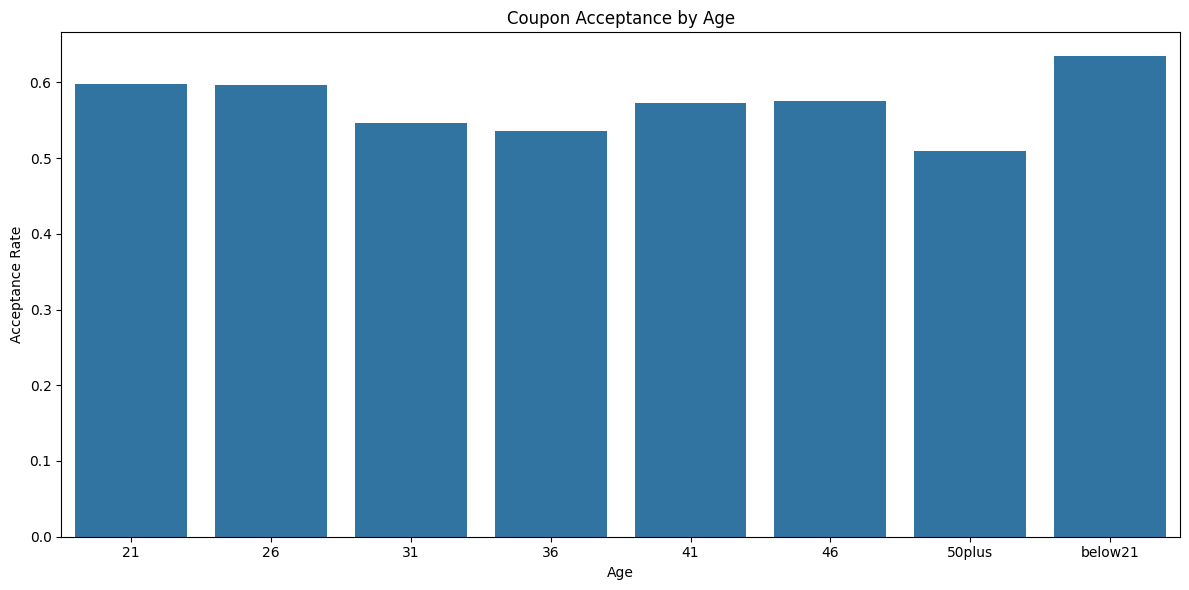

In [59]:
# Group data by age and calculate acceptance rate
acceptance_by_age = coupons.groupby('age')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='Y', data=acceptance_by_age)
plt.title('Coupon Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

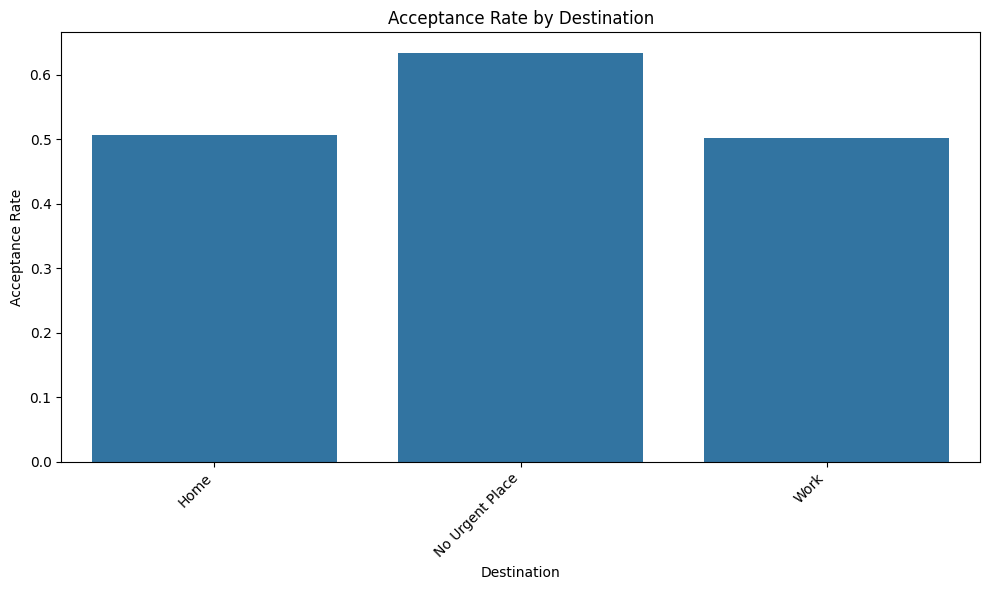

In [60]:
# Group data by destination and calculate acceptance rate
acceptance_by_destination = coupons.groupby('destination')['Y'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='Y', data=acceptance_by_destination)
plt.title('Acceptance Rate by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

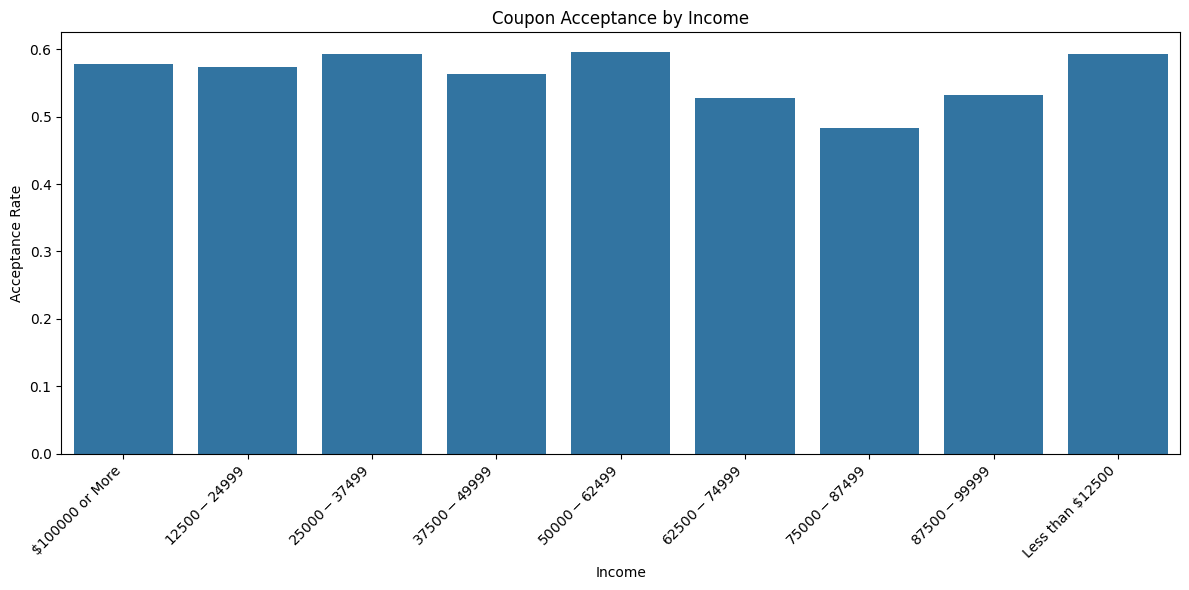

In [61]:
# Group data by income and calculate acceptance rate
acceptance_by_income = coupons.groupby('income')['Y'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.barplot(x='income', y='Y', data=acceptance_by_income)
plt.title('Coupon Acceptance by Income')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

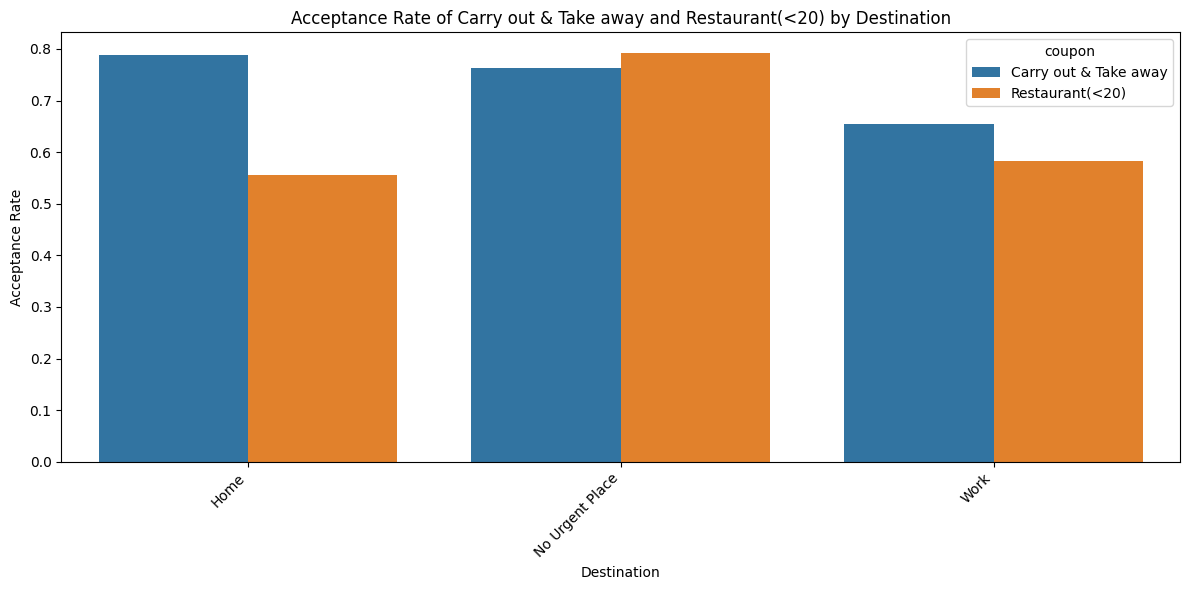

In [62]:
# Filter data for the relevant coupon types
filtered_coupons = coupons[coupons['coupon'].isin(['Carry out & Take away', 'Restaurant(<20)'])]

# Group data by destination and coupon type, then calculate acceptance rate
acceptance_by_dest_coupon = filtered_coupons.groupby(['destination', 'coupon'])['Y'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.barplot(x='destination', y='Y', hue='coupon', data=acceptance_by_dest_coupon)
plt.title('Acceptance Rate of Carry out & Take away and Restaurant(<20) by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()